# **Analisis Complaint Ticket dan Rekomendasi Strategi Bisnis**
### **Pendahuluan**
Analisis ini bertujuan untuk mengidentifikasi tren dari data complaint ticket yang diterima oleh perusahaan. Dengan memahami tren tersebut, dapat menyediakan insight yang membantu perusahaan dalam meningkatkan kualitas layanan pelanggan. Selain itu, analisis ini juga akan memberikan rekomendasi strategi bisnis yang dapat digunakan perusahaan untuk merespons masalah yang dihadapi pelanggan.

Data yang dianalisis mencakup keluhan pelanggan dengan informasi terkait waktu, lokasi, status keluhan, dan cara keluhan diterima.

### **Tujuan**

1. Mengidentifikasi Kategori keluhan yang paling banyak
2. Mengidentifikasi tren keluhan pelanggan dari waktu ke waktu.
3. Mengetahui kanal pengaduan yang paling banyak digunakan pelanggan.
4. Menganalisis status keluhan (Open, Closed, Solved).
5. Menemukan lokasi yang paling banyak mengajukan keluhan.
6. Menemukan keluhan dengan pihak ketiga
7. Memberikan rekomendasi untuk meningkatkan kualitas layanan berdasarkan hasil analisis.


### **Struktur Analisis:**
1. Data loading dan pemeriksaan awal.
2. Pembersihan data (data cleaning).
3. Analisis eksploratif data (EDA) dan Visualisasi data.
4. Kesimpulan dan rekomendasi bisnis.

### **1. Mengenal Data**

In [1]:
# import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Link Google Drive dataset
url = 'https://drive.google.com/uc?export=download&id=1jr3EXQDeEzwnJqG0YzYOfdETvoDCCDe9'


In [2]:
# Membaca file CSV
data = pd.read_csv(url)

# Menampilkan beberapa baris pertama data untuk mengenal struktur data
data.head()


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone;;
0,250635,Disney Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009.0,Closed,No;;
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102.0,Closed,No;;
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101.0,Closed,Yes;;
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101.0,Open,Yes;;
4,307175,Disney not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101.0,Solved,No;;


In [3]:
#Mendapatkan Info dari setiap kolom pada Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ticket #                       2224 non-null   object 
 1   Customer Complaint             2106 non-null   object 
 2   Date                           2106 non-null   object 
 3   Date_month_year                2106 non-null   object 
 4   Time                           2106 non-null   object 
 5   Received Via                   2106 non-null   object 
 6   City                           2106 non-null   object 
 7   State                          2106 non-null   object 
 8   Zip code                       2106 non-null   float64
 9   Status                         2106 non-null   object 
 10  Filing on Behalf of Someone;;  2106 non-null   object 
dtypes: float64(1), object(10)
memory usage: 191.2+ KB


**Deskripsi Dataset**

Dataset ini berisi **2224 entri** dan **11 kolom** terkait keluhan pelanggan. Berikut adalah penjelasan kolom-kolom yang ada:

- **Ticket #**: ID unik untuk setiap keluhan.
- **Customer Complaint**: Deskripsi keluhan pelanggan.
- **Date & Time**: Waktu keluhan diterima.
- **Received Via**: Saluran yang digunakan pelanggan untuk mengajukan keluhan.
- **City, State, Zip code**: Lokasi pelanggan.
- **Status**: Status keluhan (Open, Closed, Solved).
- **Filing on Behalf of Someone**: Apakah keluhan diajukan atas nama orang lain.



In [4]:
# Memeriksa setiap kolom untuk memastikan kualitas data
def describe_columns(data):
    for column in data.columns:
        print(f"Memeriksa kolom: '{column}'")

        # Tipe data
        print(f"Tipe data: {data[column].dtype}")

        # Jumlah nilai yang hilang
        missing_count = data[column].isnull().sum()
        print(f"Jumlah nilai yang hilang: {missing_count}")

        # Jumlah nilai unik
        unique_count = data[column].nunique()
        print(f"Jumlah nilai unik: {unique_count}")

        # Menampilkan beberapa contoh nilai
        sample_values = data[column].unique()[:5]
        print(f"Contoh nilai: {sample_values}")

        print()

# Memanggil fungsi
describe_columns(data)

Memeriksa kolom: 'Ticket #'
Tipe data: object
Jumlah nilai yang hilang: 0
Jumlah nilai unik: 2107
Contoh nilai: ['250635' '223441' '242732' '277946' '307175']

Memeriksa kolom: 'Customer Complaint'
Tipe data: object
Jumlah nilai yang hilang: 118
Jumlah nilai unik: 1714
Contoh nilai: ['Disney Cable Internet Speeds'
 'Payment disappear - service got disconnected' 'Speed and Service'
 'Disney Imposed a New Usage Cap of 300GB that punishes streaming.'
 'Disney not working and no service to boot']

Memeriksa kolom: 'Date'
Tipe data: object
Jumlah nilai yang hilang: 118
Jumlah nilai unik: 91
Contoh nilai: ['22-04-15' '04-08-15' '18-04-15' '05-07-15' '26-05-15']

Memeriksa kolom: 'Date_month_year'
Tipe data: object
Jumlah nilai yang hilang: 118
Jumlah nilai unik: 91
Contoh nilai: ['22-Apr-15' '04-Aug-15' '18-Apr-15' '05-Jul-15' '26-May-15']

Memeriksa kolom: 'Time'
Tipe data: object
Jumlah nilai yang hilang: 118
Jumlah nilai unik: 2076
Contoh nilai: ['3:53:50 PM' '10:22:56 AM' '9:55:47 AM' '1

### **2. Pembersihan Data**
**langkah-langkah pembersihan data yang perlu dilakukan adalah:**

1. Mengganti ';;' dengan NaN pada kolom Ticket # untuk menandai data yang kosong.
2. Menghapus ';;' dari kolom `Filing on Behalf of Someone ;;` dan memindahkannya ke kolom `Filing on Behalf of Someone`.
3. Menghapus kolom `Filing on Behalf of Someone ;;` dari dataset karena sudah tidak diperlukan.
4. Mengatasi nilai kosong (missing values) untuk menjaga keutuhan data.
5. Membersihkan format dan karakter yang tidak diperlukan pada kolom-kolom:
* **Ticket #:** Menghilangkan spasi tambahan.
* **Customer Complaint:** Menghapus karakter khusus.
* **Date dan Date_month_year:** Mengonversi ke format tanggal yang konsisten.
* **Time:** Mengonversi ke format waktu yang konsisten.
* **Received Via:** Menghilangkan spasi tambahan.
* **City dan State:** Mengonversi format huruf kapital dan menghilangkan spasi tambahan.
* **Zip code:** Menghilangkan desimal.
* **Status:** Menghilangkan spasi tambahan.



### **Mengganti karakter ';;' dengan NaN pada kolom Ticket #**

In [5]:
# Tabel missing values
missing_values = data.isnull().sum()
missing_values

,0
Ticket #,0
Customer Complaint,118
Date,118
Date_month_year,118
Time,118
Received Via,118
City,118
State,118
Zip code,118
Status,118


Dari tabel missing value di atas, terdapat 118 nilai kosong pada hampir semua kolom dalam dataset. Pada kolom `Ticket #` tidak ditemukan missing values karena adanya karakter ';;' yang tidak seharusnya, yang menyebabkan data tidak terbaca dengan benar. Maka karakter ';;' dalam kolom `Ticket #` diganti dengan nilai NaN  untuk menyesuaikannya dengan data pada kolom yang lain

In [6]:
# Mengganti nilai ';;' dengan NaN
data['Ticket #'] = data['Ticket #'].replace(';;', np.nan)
missing_values = data.isnull().sum()
missing_values

,0
Ticket #,118
Customer Complaint,118
Date,118
Date_month_year,118
Time,118
Received Via,118
City,118
State,118
Zip code,118
Status,118


### **Menghilangkan karakter yang tidak dibutuhkan pada kolom `Filing on Behalf of Someone;;` dan membuat kolom baru yaitu `Filing on Behalf of Someone`**
Pada kolom `Filing on Behalf of Someone;;` terdapat karakter ';;' yang tidak dibutuhkan. Untuk mengatasinya, setiap karakter ';;' akan dihapus dan dipindahkan ke kolom baru yang  bernama `Filing on Behalf of Someone`.

In [7]:
# Menghapus ';;' pada kolom 'Filing on Behalf of Someone ;;'
data['Filing on Behalf of Someone'] = data['Filing on Behalf of Someone;;'].str.replace(r';+', '', regex=True)
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone;;,Filing on Behalf of Someone
0,250635,Disney Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009.0,Closed,No;;,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102.0,Closed,No;;,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101.0,Closed,Yes;;,Yes
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101.0,Open,Yes;;,Yes
4,307175,Disney not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101.0,Solved,No;;,No


### **Menghapus kolom 'Filing on Behalf of Someone;;`**

In [8]:
# Menghapus kolom 'Filing on Behalf of Someone;;' dari dataset
data.drop('Filing on Behalf of Someone;;', axis=1, inplace=True)

#Menampilkan data
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Disney Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009.0,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102.0,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101.0,Closed,Yes
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101.0,Open,Yes
4,307175,Disney not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101.0,Solved,No


In [9]:
# Menghitung persentase nilai yang hilang
total_rows = len(data)
missing_percentage = (missing_values / total_rows) * 100

# Menampilkan hasil
print("Jumlah baris dalam dataset:", total_rows)
print("\nPersentase nilai yang hilang di setiap kolom:\n", missing_percentage)

Jumlah baris dalam dataset: 2224

Persentase nilai yang hilang di setiap kolom:
 Ticket #                         5.305755
Customer Complaint               5.305755
Date                             5.305755
Date_month_year                  5.305755
Time                             5.305755
Received Via                     5.305755
City                             5.305755
State                            5.305755
Zip code                         5.305755
Status                           5.305755
Filing on Behalf of Someone;;    5.305755
dtype: float64


### **Mengatasi missing value**
Pada dataset complaint ticket, terdapat beberapa kolom yang mengandung missing values. Terdapat dua cara untuk mengatasi missing value tersebut yaitu :
* **Menghapus Missing Values:**
Jika persentase missing values kecil, maka dapat mempertimbangkan untuk menghapus baris yang mengandung missing values.
* **Mengisi dengan Nilai Default (Imputation)**:
Dengan imputasi missing value dapat diisi dengan nilai yang relevan. Misalnya
1. ***Untuk imputasi kolom numerik***, Dapat menggunakan nilai mean atau median. Namun, untuk kolom Zip Code, pengisian nilai kosong dengan mean atau median kurang tepat karena Zip Code adalah kode area, bukan nilai kontinu. Sebaiknya, menggunakan nilai mode untuk kolom ini.
2. ***Untuk imputasi kolom kategorikal***, untuk kolom kategorikal seperti City atau Status, kita dapat mengisi nilai kosong dengan mode

**Kesimpulan**: Karena jumlah missing value dalam dataset adalah 5.3% dan tersebar per baris, pengaruhnya terhadap hasil analisis tidak signifikan. Oleh karena itu, metode terbaik adalah menghapus baris dengan missing value tersebut.

In [10]:
# Menghapus missing values
data_cleaned = data.dropna()

# Mengecek apakah masih ada missing values
missing_values_cleaned = data_cleaned.isnull().sum()
missing_values_cleaned

,0
Ticket #,0
Customer Complaint,0
Date,0
Date_month_year,0
Time,0
Received Via,0
City,0
State,0
Zip code,0
Status,0


### **Membersihkan format dan karakter yang tidak diperlukan pada kolom-kolom**

In [11]:
# Data cleaning untuk kolom lainnnya
data_cleaned.loc[:, 'Ticket #'] = data_cleaned['Ticket #'].astype(str).str.strip()
data_cleaned.loc[:, 'Customer Complaint'] = data_cleaned['Customer Complaint'].str.replace(r'[^\w\s]', '', regex=True)
data_cleaned.loc[:, 'Date'] = pd.to_datetime(data_cleaned['Date'], format='%d-%m-%y', errors='coerce')
data_cleaned.loc[:, 'Date_month_year'] = pd.to_datetime(data_cleaned['Date_month_year'], format='%d-%b-%y', errors='coerce')
data_cleaned.loc['Time'] = pd.to_datetime(data_cleaned['Time'], format='%I:%M:%S %p', errors='coerce')
data_cleaned.loc[:, 'Received Via'] = data_cleaned['Received Via'].str.strip()
data_cleaned.loc[:, 'City'] = data_cleaned['City'].str.title().str.strip()
data_cleaned.loc[:, 'State'] = data_cleaned['State'].str.title().str.strip()
data_cleaned.loc[:, 'Zip code'] = data_cleaned['Zip code'].astype(str).str.split('.').str[0]
data_cleaned.loc[:, 'Status'] = data_cleaned['Status'].str.strip()

#Menampilkan data baru yang telah dibersihakan (Data Cleaning)
data_cleaned.head()


<ipython-input-11-cfa40a1a96d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc['Time'] = pd.to_datetime(data_cleaned['Time'], format='%I:%M:%S %p', errors='coerce')


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Disney Cable Internet Speeds,2015-04-22 00:00:00,2015-04-22 00:00:00,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear service got disconnected,2015-08-04 00:00:00,2015-08-04 00:00:00,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18 00:00:00,2015-04-18 00:00:00,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,2015-07-05 00:00:00,2015-07-05 00:00:00,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Disney not working and no service to boot,2015-05-26 00:00:00,2015-05-26 00:00:00,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [12]:
# Mengecek apakah ada data duplikat
duplicates = data_cleaned.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

# Menampilkan baris yang duplikat jika ada
if duplicates > 0:
    print("Baris duplikat:")
    print(data[data_cleaned.duplicated(keep=False)])  # Menampilkan semua baris yang duplikat

Jumlah data duplikat: 0


In [13]:
#Menampilkan data yang sudah bersih
data_cleaned.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Disney Cable Internet Speeds,2015-04-22 00:00:00,2015-04-22 00:00:00,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear service got disconnected,2015-08-04 00:00:00,2015-08-04 00:00:00,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18 00:00:00,2015-04-18 00:00:00,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,2015-07-05 00:00:00,2015-07-05 00:00:00,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Disney not working and no service to boot,2015-05-26 00:00:00,2015-05-26 00:00:00,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [14]:
# Menghitung total keluhan dalam dataset
total_keluhan = data_cleaned.shape[0]

print(f"Total jumlah keluhan: {total_keluhan}")

Total jumlah keluhan: 2107


### **3. Analisis Eksploratif Data (EDA) dan Visualisasi Data**
**Analisis Kategori Keluhan**:
Analisis ini dilakukan untuk menunjukkan jenis masalah utama yang dihadapi pelanggan. Dengan memahami jenis keluhan yang paling sering muncul.

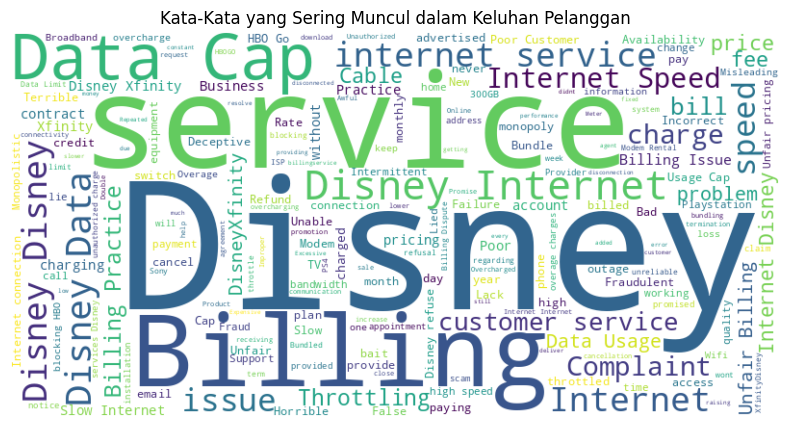

In [15]:
all_complaints = ' '.join(data_cleaned['Customer Complaint'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_complaints)

# Visualisasi WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata-Kata yang Sering Muncul dalam Keluhan Pelanggan')
plt.show()


**Analisis  Tren Keluhan**:
 Menganalisis perubahan jumlah keluhan pelanggan dari waktu ke waktu (per bulan).

<ipython-input-16-9da941ecaa3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
<ipython-input-16-9da941ecaa3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Month'] = data_cleaned['Date'].dt.strftime('%B')


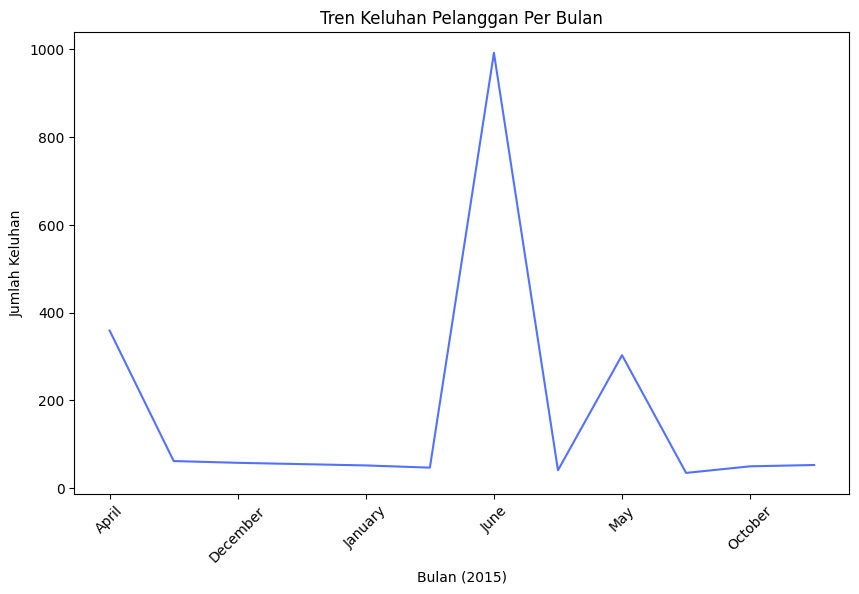

In [16]:
# Memastikan kolom 'Date'
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

# Menambahkan kolom 'Month'
data_cleaned['Month'] = data_cleaned['Date'].dt.strftime('%B')

# Menghitung jumlah keluhan per bulan
complaint_trend = data_cleaned.groupby('Month').size()

# Visualisasi tren keluhan per bulan
plt.figure(figsize=(10, 6))
complaint_trend.plot(kind='line', title='Tren Keluhan Pelanggan Per Bulan', xlabel='Bulan (2015)', ylabel='Jumlah Keluhan',color='#5271ff')
plt.xticks(rotation=45)
plt.show()

**Analisis Distribusi Keluhan Berdasarkan Waktu**:
Melihat kapan puncak pengaduan terjadi sepanjang hari

<ipython-input-17-abf8fcc7fa63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Time'] = pd.to_datetime(data_cleaned['Time'], format='%I:%M:%S %p', errors='coerce')
<ipython-input-17-abf8fcc7fa63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Hour'] = data_cleaned['Time'].apply(lambda x: x.hour if pd.notnull(x) else -1)


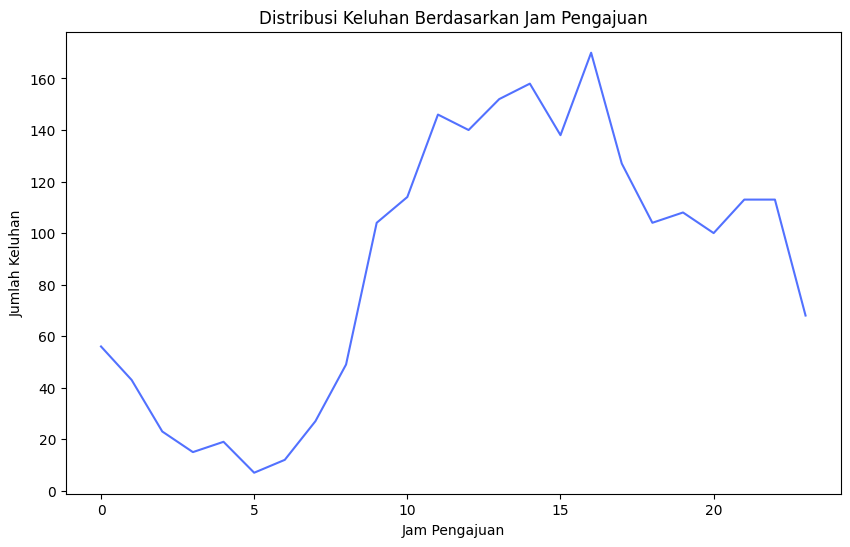

In [17]:
# Memastikan kolom 'Time' berhasil diubah ke tipe datetime
data_cleaned['Time'] = pd.to_datetime(data_cleaned['Time'], format='%I:%M:%S %p', errors='coerce')

# Mengekstraksi jam dari kolom 'Time'
data_cleaned['Hour'] = data_cleaned['Time'].apply(lambda x: x.hour if pd.notnull(x) else -1)

# Menghitung jumlah keluhan per jam
time_analysis = data_cleaned[data_cleaned['Hour'] != -1]['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
time_analysis.plot(kind='line', color='#5271ff')
plt.title('Distribusi Keluhan Berdasarkan Jam Pengajuan')
plt.xlabel('Jam Pengajuan')
plt.ylabel('Jumlah Keluhan')
plt.xticks(rotation=0)
plt.show()


**Analisis Sumber Pengaduan**:
 Mengidentifikasi kanal atau saluran yang paling sering digunakan pelanggan untuk mengajukan keluhan

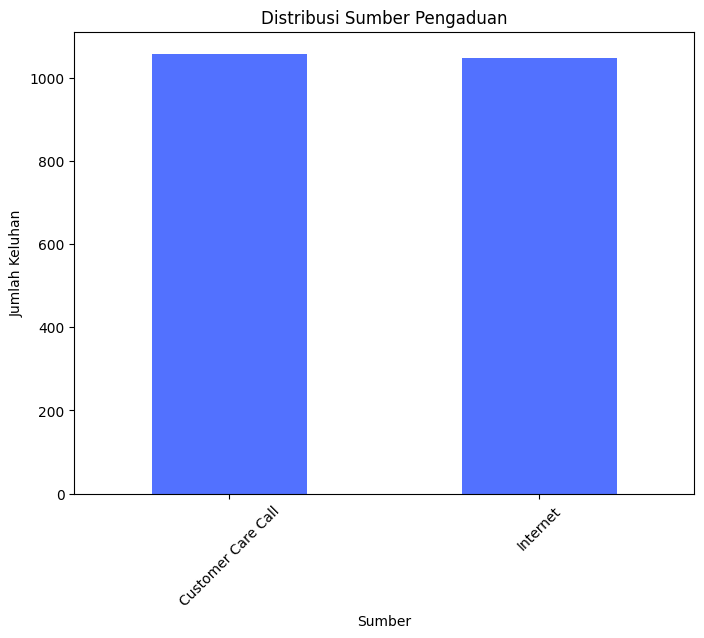

In [18]:
# Menghitung jumlah keluhan berdasarkan sumber pengaduan
source_analysis = data_cleaned['Received Via'].value_counts()

# Visualisasi sumber pengaduan
plt.figure(figsize=(8, 6))
source_analysis.plot(kind='bar', title='Distribusi Sumber Pengaduan', xlabel='Sumber', ylabel='Jumlah Keluhan', color='#5271ff')
plt.xticks(rotation=45)
plt.show()

**Analisis Status Keluhan**:
Memahami status keluhan, yaitu apakah keluhan masih terbuka (Open), telah diselesaikan (Closed), atau sedang diproses (Solved)



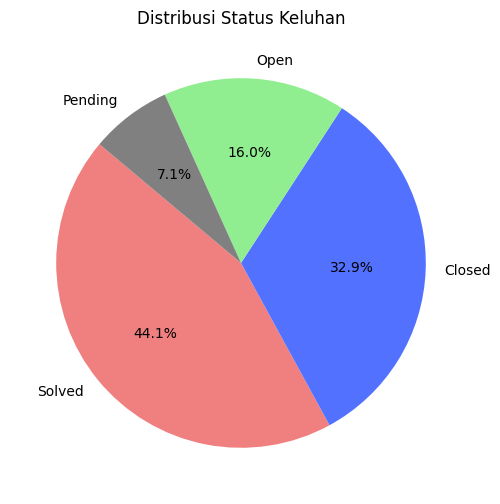

In [19]:
# Menghitung jumlah keluhan berdasarkan status
status_analysis = data_cleaned['Status'].value_counts()

# Visualisasi status keluhan
plt.figure(figsize=(6, 6))
status_analysis.plot(kind='pie', autopct='%1.1f%%', title='Distribusi Status Keluhan', startangle=140, colors=['lightcoral', '#5271ff', 'lightgreen', 'grey'])
plt.ylabel('')
plt.show()

**Analisis lokasi Sumber Keluhan**:
 Mengetahui lokasi (kota atau wilayah) yang memiliki jumlah keluhan paling banyak.



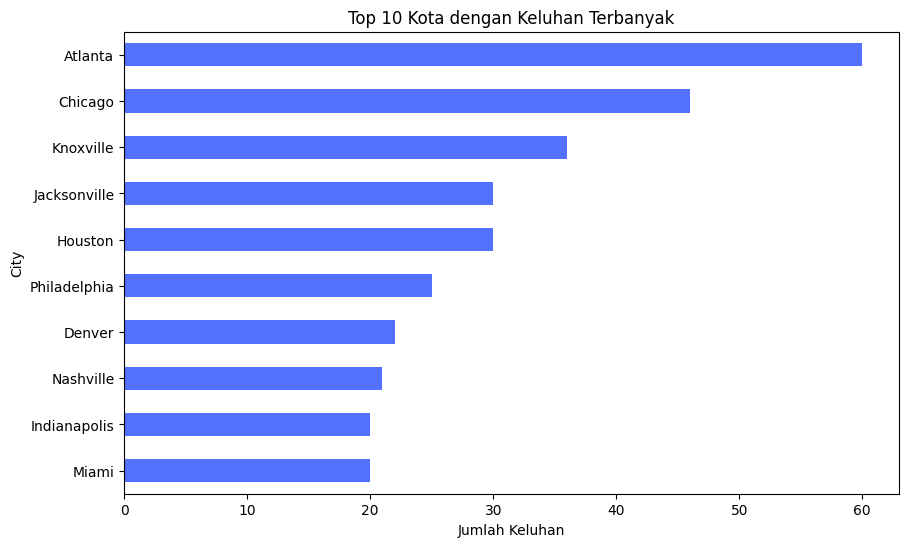

In [20]:
# Menghitung jumlah keluhan berdasarkan kota
city_analysis = data_cleaned['City'].value_counts().head(10)

# Visualisasi kota dengan keluhan terbanyak
plt.figure(figsize=(10, 6))
city_analysis.plot(kind='barh', title='Top 10 Kota dengan Keluhan Terbanyak', xlabel='Jumlah Keluhan', color='#5271ff')
plt.gca().invert_yaxis()
plt.show()

**Analisis Keluhan Berulang (Repeat Complaints)**:
Memeriksa apakah ada pelanggan yang sering mengajukan keluhan yang sama.

In [21]:
# Menghitung jumlah keluhan per pelanggan berdasarkan kolom 'Ticket #'
repeat_customers = data_cleaned['Ticket #'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]

# Menampilkan pelanggan dengan keluhan berulang
print("Pelanggan dengan Keluhan Berulang:")
print(repeat_customers)

Pelanggan dengan Keluhan Berulang:
Series([], Name: count, dtype: int64)


**Analisis Keluhan dengan Perwakilan Pihak Ketiga**:
Untuk melihat distribusi keluhan yang diajukan atas nama orang lain.

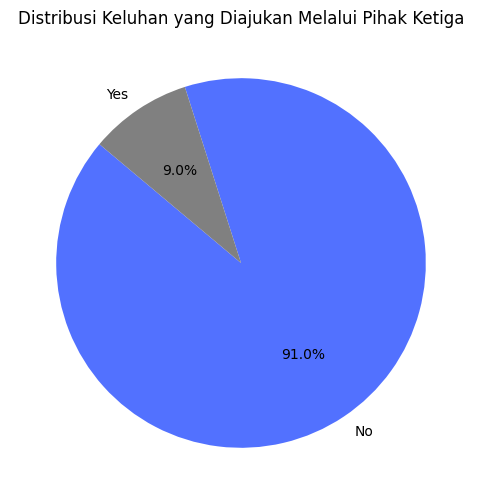

In [22]:
# Menghitung jumlah keluhan berdasarkan kolom "Filing on Behalf of Someone"
filing_analysis = data_cleaned['Filing on Behalf of Someone'].value_counts()

# Visualisasi distribusi "Filing on Behalf of Someone"
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
filing_analysis.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#5271ff', 'grey'])
plt.title('Distribusi Keluhan yang Diajukan Melalui Pihak Ketiga')
plt.ylabel('')
plt.show()

## **4. Kesimpulan Strategi Bisnis**
1. **Tingkatkan Kualitas Layanan Internet**: Fokus pada peningkatan kecepatan dan konsistensi koneksi.
2. **Revisi Kebijakan Data:** Menawarkan paket data yang lebih fleksibel.
3. **Transparansi Penagihan:** Mengimplementasikan sistem penagihan yang jelas.
4. **Pelatihan Tim Customer Care:** Memberikan pelatihan untuk meningkatkan responsivitas dan empati.
5. **Optimasi Saluran Pengaduan:** Mempermudah akses dan penggunaan platform digital.
6. **Analisis Lonjakan Keluhan:** Menyelidiki penyebab lonjakan keluhan di bulan Juni 2015.
7. **Monitoring dan Evaluasi**: Melakukan pemantauan berkala terhadap tren keluhan.1.